# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 65.2 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Subset
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from pytorch_lightning.callbacks import LearningRateFinder

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [5]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-18 14:34:47--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-18 14:34:47--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf36f73f7a6908676f11ae5e42e.dl.dropboxusercontent.com/cd/0/get/CHxgcSnc6X7bc98Soj50B_cRkYPcw_CbpaXFBp9qCJq63u0mWDOKJvyiR0GftL4qxMHjeBfQgsPSkRvWElEGvScIIti1QwDk6pq9aaJE51qh4CV3UA20O0bIwkQokrvCfYo9fzKhcjazaYOTErJHPOgx/file?dl=1# [following]
--2023-11-18 14:34:48--  https://ucf36f73f7a6908676f11ae5e42e.dl.dropboxusercontent.com/cd/0/get/CHxgcSnc6X7bc98Soj50B_cRkYPcw_CbpaXFBp9qCJq63u0mWDOKJvyiR0GftL4qxMHjeBfQgsPSkRvWElEGvScIIti1QwDk6pq9

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [6]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    v2.RandomAdjustSharpness(2),
    v2.ColorJitter(hue=0.05, saturation=0.05),
    v2.RandomHorizontalFlip(),
    v2.ToTensor(),
    v2.Normalize([0.4782, 0.4462, 0.3978], [0.2418, 0.2390, 0.2372])
])
val_transform = transforms.Compose([
    v2.ToTensor(),
    v2.Normalize([0.4782, 0.4462, 0.3978], [0.2418, 0.2390, 0.2372])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=64, num_workers=2)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [7]:
# ищу среднее и ст.откл. для нормализации выше
# вдохновлено ответами тут: https://stackoverflow.com/questions/60101240/finding-mean-and-standard-deviation-across-image-channels-pytorch

def find_mean_and_std(dataloader: DataLoader) -> tuple:
    mean = 0.0
    std = 0.0
    nimages = 0
    for batch, _ in dataloader:
        batch = batch.view(batch.size(0), batch.size(1), -1)
        nimages += batch.size(0)
        mean += batch.mean(2).sum(0)
        std += batch.std(2).sum(0)
    mean /= nimages
    std /= nimages
    return mean, std

In [8]:
# ищу среднее и ст.откл. для нормализации выше

# print(find_mean_and_std(train_dataloader))

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

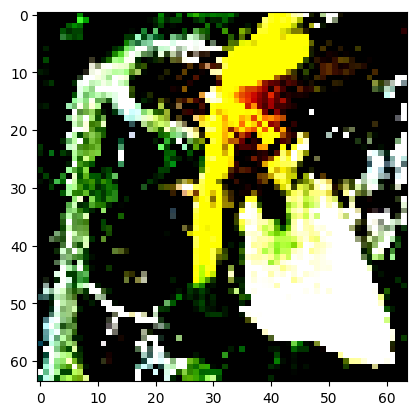

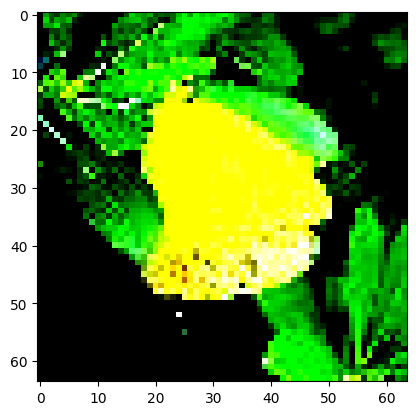

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

In [ ]:
images[5].shape

torch.Size([3, 64, 64])

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [9]:
class MyCNNet(torch.nn.Module):
    def __init__(self, hidden):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3,
                      padding=1), # [16 x 64 x 64]
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3,
                      padding=1), # [16 x 64 x 64]
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # [16 x 32 x 32]

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3,
                      padding=1), # [32 x 32 x 32]
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,
                      padding=1), # [32 x 32 x 32]
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # [32 x 16 x 16]

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,
                      padding=1), # [64 x 16 x 16]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,
                      padding=1), # [64 x 16 x 16]
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,
                      padding=1), # [64 x 16 x 16]
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # [64 x 8 x 8]

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,
                      padding=1), # [128 x 8 x 8]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,
                      padding=1), # [128 x 8 x 8]
            nn.BatchNorm2d(128),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3,
                      padding=1), # [128 x 8 x 8]
            nn.BatchNorm2d(128),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2), # [128 x 4 x 4]

            nn.Flatten()
        )

        self.head = nn.Sequential(
            nn.Linear(128*4**2, hidden),
            nn.BatchNorm1d(hidden),
            nn.LeakyReLU(),
            nn.Linear(hidden, hidden),
            nn.BatchNorm1d(hidden),
            nn.LeakyReLU(),
            nn.Linear(hidden, 200)
        )

        self._loss = nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.predictions = torch.Tensor()

    def _forward(self, x):
        # runs the Neural Network
        x = self.encoder(x)
        return self.head(x)

    def forward(self, images, target=None):
        output = self._forward(images)
        if target is None:
          return output

        loss = self._loss(output, target)
        self.targets = torch.cat((self.targets.to(device), target.to(device)), 0)
        pred = torch.argmax(output, dim=-1)
        self.predictions = torch.cat((self.predictions.to(device), pred.to(device)), 0)
        self.accuracy = accuracy(self.predictions.long(), self.targets.long(), task='multiclass', num_classes=200).to(device)

        return loss

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.predictions = torch.Tensor()
        return self.accuracy

In [10]:
from torchvision.models import resnet18

In [11]:
resnet18()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Тренировочный класс lightning

In [12]:
class MyModule(pl.LightningModule):
    def __init__(self, learning_rate):
        super().__init__()
        self.model = resnet18(pretrained=False)
        self.model.fc = nn.Identity()
        self.model.clas = nn.Linear(512, 200)
        self.learning_rate = learning_rate
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        opt = torch.optim.Adam(self.model.parameters(),
                              lr=self.learning_rate)
        sched = torch.optim.lr_scheduler.StepLR(opt, 2, 0.1)
        return ([opt], [sched])
        # return opt

    def training_step(self, train_batch, batch_idx):
        img, trgt = train_batch
        preds = self.forward(img)
        loss = self.loss(preds, trgt)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        img, trgt = val_batch
        preds = self.forward(img)
        loss = self.loss(preds, trgt)
        self.log("val_loss", loss, prog_bar=True)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), trgt.long(), task = 'multiclass', num_classes=200)
        self.log("accuracy", acc, prog_bar=True)

In [13]:
img_size = 64
lr = 0.005
hidden_size = 4096
num_epoch = 10

In [14]:
wandb_logger = WandbLogger(log_model='all', project="mycnnnets-project") # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = "cuda" if torch.cuda.is_available() else "cpu"

module = MyModule(lr).to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [15]:
trainer = pl.Trainer(logger=wandb_logger,
                     accelerator=device,
                     max_epochs=num_epoch,
                    #  callbacks=[LearningRateFinder()],
                     deterministic=True,
                     enable_progress_bar=True)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: vchemsmisl. Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.3 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [16]:
wandb.finish()

accuracy,▁▃▇███
epoch,▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇████
train_loss,█▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▃▁▃▂▂▁▂▂▂▃▂▁▂▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▆▂▁▁▁
accuracy,0.3499
epoch,6
train_loss,2.37881
trainer/global_step,10449
val_loss,2.79063


### Валидация результатов задания

In [17]:
seed_everything(123456)

In [18]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy_score = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
          preds = model(images)
        acc_batch = (preds.argmax(1) == labels).sum().item() / labels.size(0)
        accuracy_score += acc_batch
    accuracy_score /= len(test_dataloader)
    return accuracy_score

In [19]:
model = module.model

accuracy_score = evaluate_task(model, val_dataloader)
print(f'\n\nAccuracy: {accuracy_score}')
print(f"\nОценка за это задание составит {np.clip(10 * accuracy_score / 0.44, 0, 10):.2f} баллов")


100%|██████████| 157/157 [00:05<00:00, 28.83it/s]



Accuracy: 0.35559315286624205

Оценка за это задание составит 8.08 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [20]:
from torchvision.models import wide_resnet101_2
from torchvision.models import vit_b_16
from torchvision.models import convnext_base

In [ ]:
vit_b_16()

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [21]:
convnext_base()

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=128, out_features=512, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=512, out_features=128, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose([
    v2.Resize((224)),
    v2.ToTensor(),
    v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
val_transform = transforms.Compose([
    v2.Resize((224)),
    v2.ToTensor(),
    v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=64, num_workers=2)

### Тренировочный класс lightning

In [ ]:
class MyModule(pl.LightningModule):
    def __init__(self, learning_rate):
        super().__init__()
        self.model = vit_b_16(weights='IMAGENET1K_V1')
        self.model.heads = nn.Identity()
        for param in self.model.parameters():
          param.requires_grad = False
        self.model.clas = nn.Linear(768, 200)

        self.learning_rate = learning_rate
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        with torch.no_grad():
          features = self.model(x)
        return self.model.clas(features)

    def configure_optimizers(self):
        opt = torch.optim.SGD(self.model.parameters(),
                              lr=self.learning_rate)
        return opt

    def training_step(self, train_batch, batch_idx):
        img, trgt = train_batch
        preds = self.forward(img)
        loss = self.loss(preds, trgt)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        img, trgt = val_batch
        preds = self.forward(img)
        loss = self.loss(preds, trgt)
        self.log("val_loss", loss, prog_bar=True)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), trgt.long(), task = 'multiclass', num_classes=200)
        self.log("accuracy", acc, prog_bar=True)

In [ ]:
img_size = 64
lr = 0.1
num_epoch = 3 # тестировал максимум на 3х эпохах, но в итоге сильные модели достигали качества на 1й эпохе, поэтому останавливал

In [ ]:
wandb_logger = WandbLogger(log_model='all',
                           project="my-pretrained-cnnnets-project") # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = "cuda" if torch.cuda.is_available() else "cpu"

module = MyModule(lr)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger,
                     accelerator=device,
                     max_epochs=num_epoch,
                    #  callbacks=[LearningRateFinder()],
                     deterministic=True,
                     enable_progress_bar=True)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type              | Params
--------------------------------------------
0 | model | VisionTransformer | 86.0 M
1 | loss  | CrossEntropyLoss  | 0     
--------------------------------------------
153 K     Trainable params
85.8 M    Non-trainable params
86.0 M    T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
wandb.finish()

accuracy,▁
epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▃▃▂▂▁▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▂▂▁▂▁▂▂
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇███
val_loss,▁
accuracy,0.8316
epoch,0
train_loss,0.76922
trainer/global_step,1562
val_loss,0.64232


### Валидация результатов задания

In [ ]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy_score = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
          feats = model(images)
          preds = model.clas(feats)
        acc_batch = (preds.argmax(1) == labels).sum().item() / labels.size(0)
        accuracy_score += acc_batch
    accuracy_score /= len(test_dataloader)
    return accuracy_score

In [ ]:
model = module.model

accuracy_score = evaluate_task(model, val_dataloader)
print(f'\n\nAccuracy: {accuracy_score}')
print(f"\nОценка за это задание составит {np.clip(10 * (accuracy_score - 0.5) / 0.34, 0, 10):.2f} баллов")


100%|██████████| 157/157 [01:49<00:00,  1.44it/s]



Accuracy: 0.8324044585987261

Оценка за это задание составит 9.78 баллов


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

### **1 задание:**
https://api.wandb.ai/links/vchemsmisl/qhko12i0

Сначала строил свою модель, которая в основной части использовала 4 VGG-like блока. Она достигла качества на 8, но я решил опробовать модели семьи ResNet: ResNet18, ResNet34, ResNet50. Лучше всего аппроксимировала выборку модель с меньшим количеством слоёв, но вот переобучение мне слабо удалось побороть. Поэтому получилось, что ResNet18 выдала качество примерно как моя кастомная модель.

### **2 задание:**
https://api.wandb.ai/links/vchemsmisl/sau5r0ct

Тут сначала долго копался в слабеньких архитектурах типа ResNet'а с разным количеством слоёв, потом стал брать SOTA-модели (выбирал отсюда: https://paperswithcode.com/sota/image-classification-on-imagenet). Как видно на графиках, ConvNext и ViT-B/16 оказались самыми классными, причём, насколько мне помнится, ConvNext обучался быстрее (~15 минут против 20-и на ViT), но при этом ViT намного быстрее добивается приемлемого качества.